#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [72]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

# Exploratory Data Analysis

In [74]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

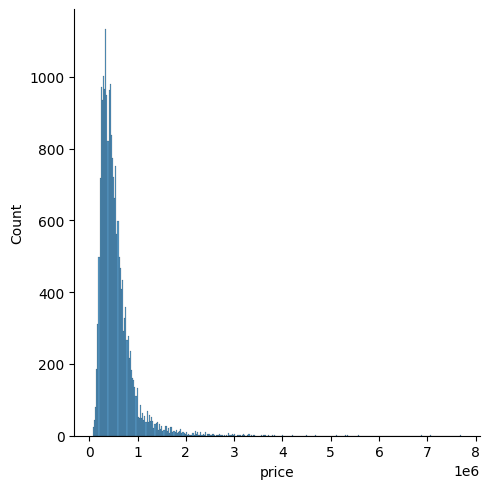

In [5]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

<Axes: ylabel='count'>

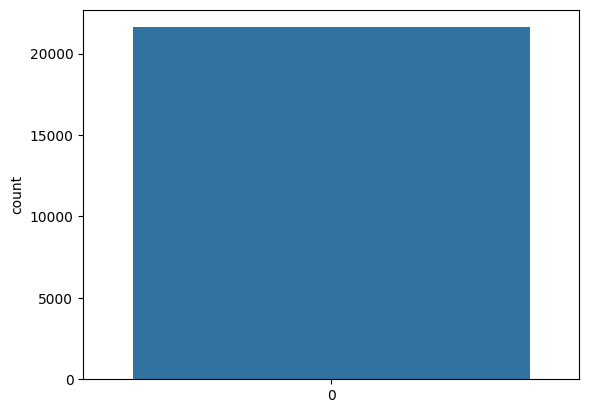

In [7]:
sns.countplot(df['bedrooms'])

<Axes: xlabel='price', ylabel='sqft_living'>

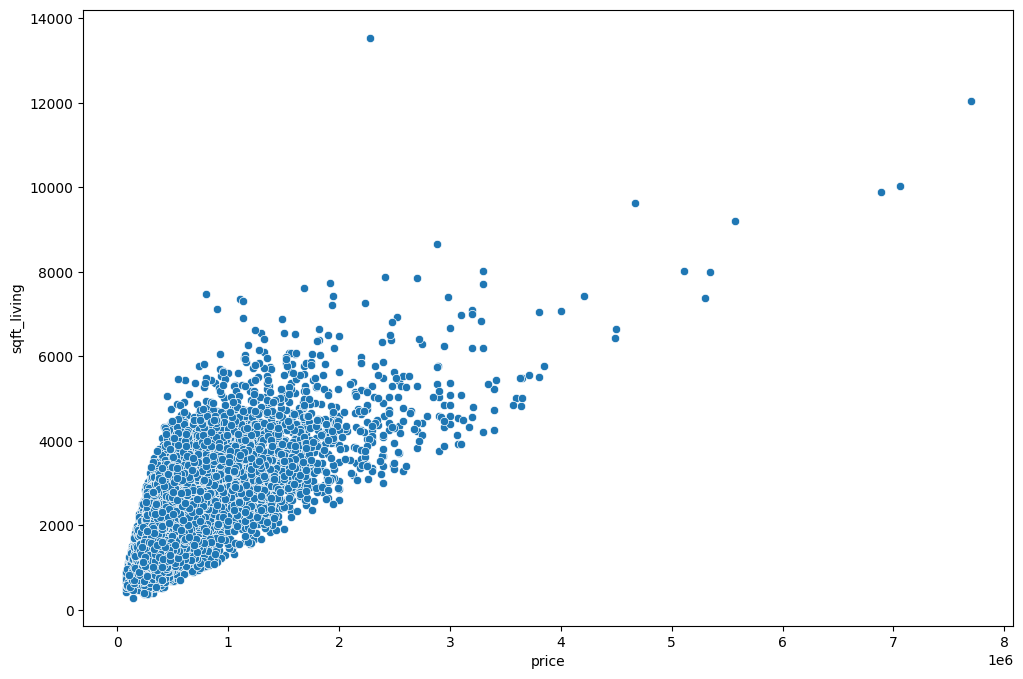

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

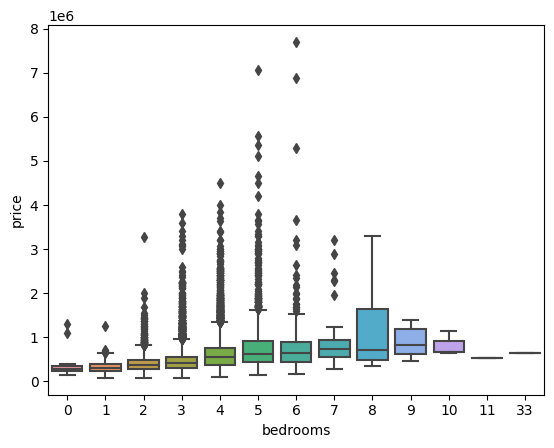

In [9]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<Axes: xlabel='price', ylabel='long'>

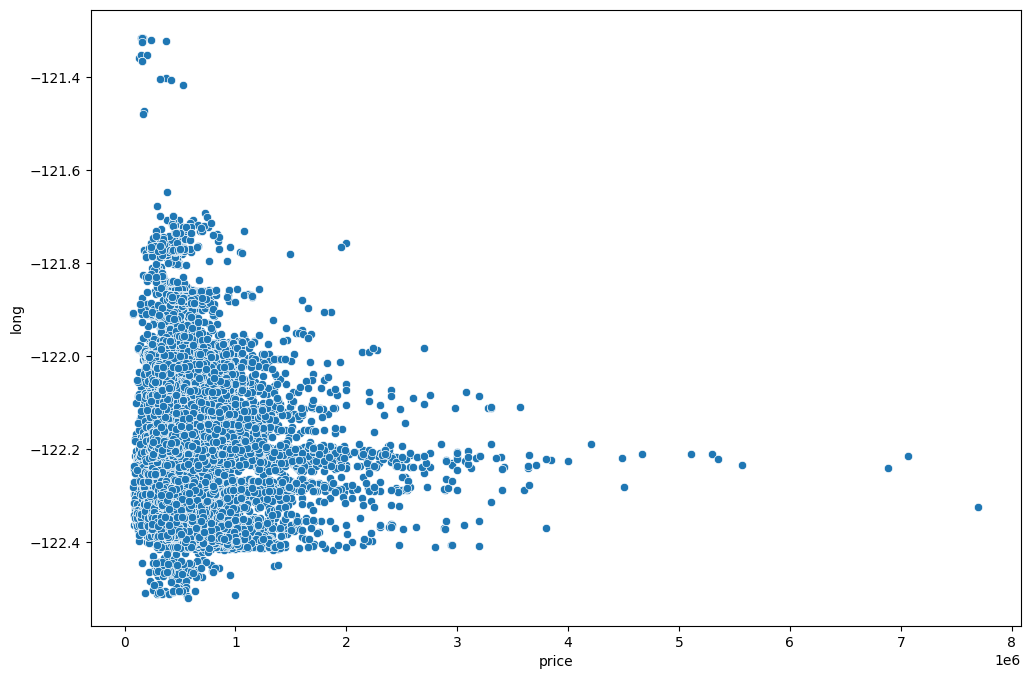

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

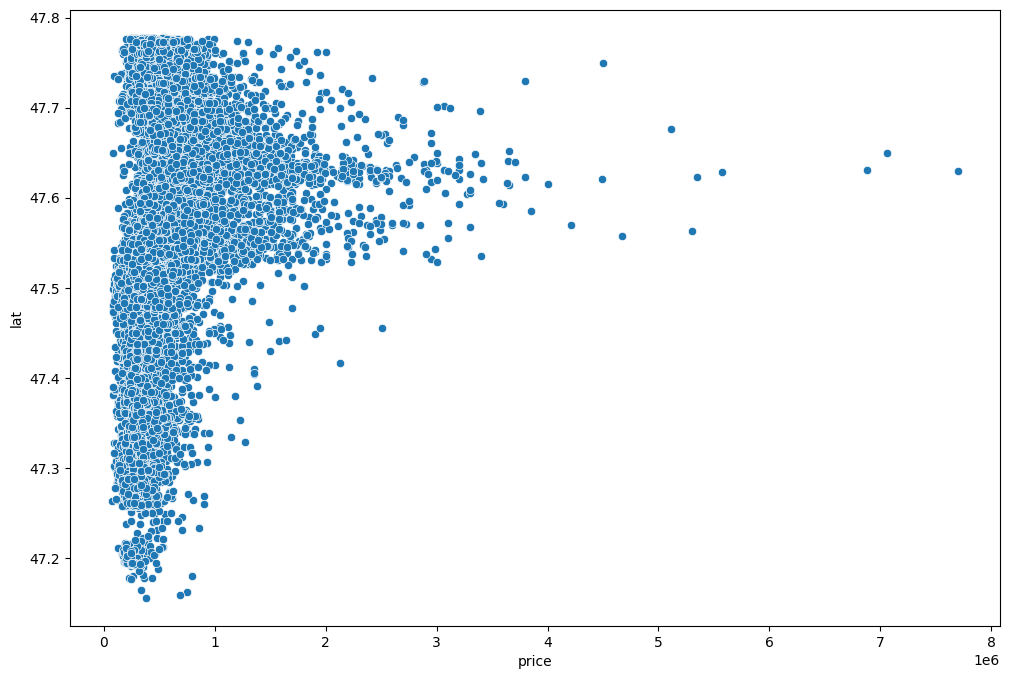

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

<Axes: xlabel='long', ylabel='lat'>

In [76]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [77]:
len(df)*(0.01)

216.13

In [79]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

<Axes: xlabel='long', ylabel='lat'>

### Other Features

<Axes: xlabel='waterfront', ylabel='price'>

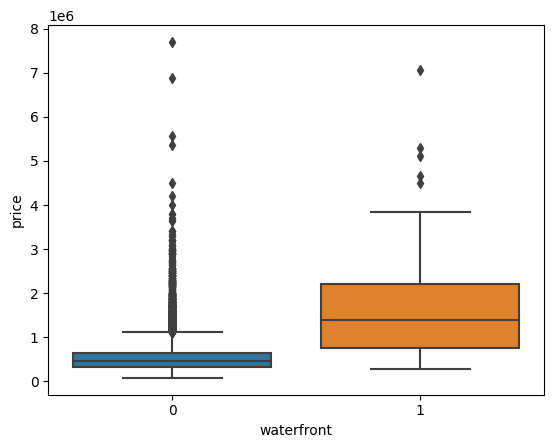

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [21]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

<Axes: xlabel='month', ylabel='price'>

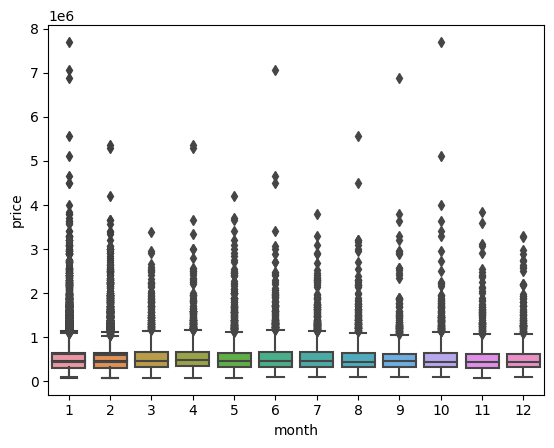

In [85]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price',data=df)
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='year', ylabel='price'>

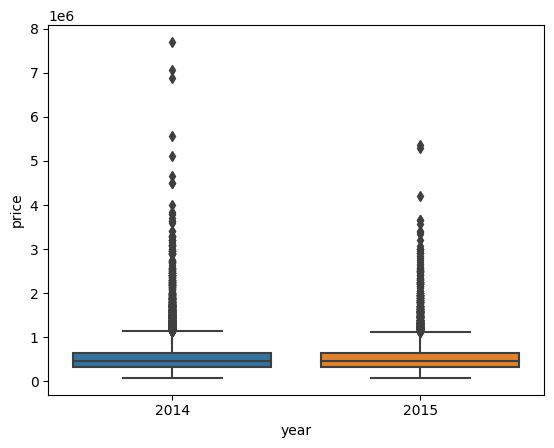

<Axes: xlabel='month', ylabel='price'>

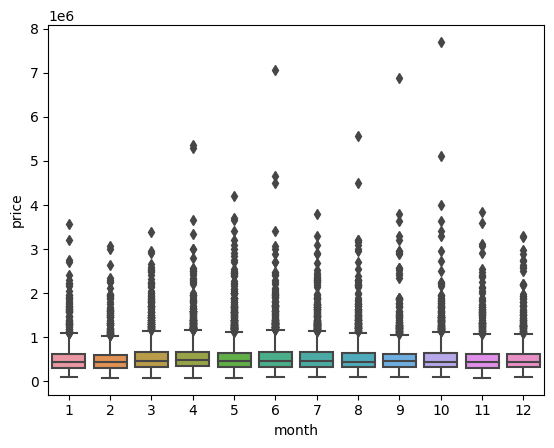

<Axes: xlabel='month'>

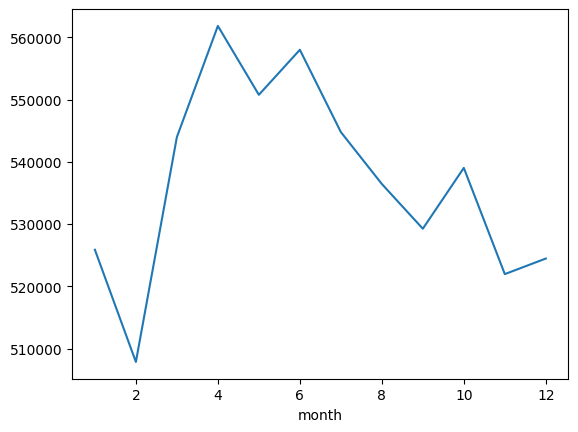

In [88]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

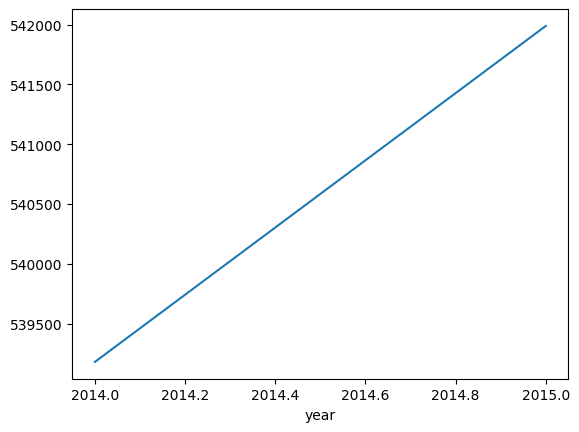

In [89]:
df.groupby('year').mean()['price'].plot()

In [90]:
df = df.drop('date',axis=1)

KeyError: "['date'] not found in axis"

In [91]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [92]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [93]:
df = df.drop('zipcode',axis=1)

In [94]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [95]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [96]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

## Scaling and Train Test Split

In [97]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [99]:
# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [100]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [101]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

## Creating a Model

In [102]:
X_train

array([[[0.55226892, 0.09090909, 0.21875   , ..., 0.01429443,
         0.36363636, 0.        ]],

       [[0.9426003 , 0.06060606, 0.125     , ..., 0.0049957 ,
         0.18181818, 1.        ]],

       [[0.24305488, 0.09090909, 0.125     , ..., 0.00821206,
         0.09090909, 1.        ]],

       ...,

       [[0.72748261, 0.09090909, 0.3125    , ..., 0.00229625,
         0.72727273, 0.        ]],

       [[0.17396191, 0.03030303, 0.09375   , ..., 0.0164827 ,
         0.45454545, 0.        ]],

       [[0.62093647, 0.12121212, 0.3125    , ..., 0.00614095,
         0.18181818, 1.        ]]])

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [118]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.layers import Flatten

# Define input layer
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Transformer layers
transformer_layer = MultiHeadAttention(num_heads=8, key_dim=16)(input_layer, input_layer, input_layer)  # query, key, value
transformer_layer = LayerNormalization(epsilon=1e-6)(transformer_layer)
transformer_layer = Dropout(0.3)(transformer_layer)

# Flatten Transformer output
transformer_flattened = Flatten()(transformer_layer)

# Dense layers
#dense_1 = Dense(64, activation='relu')(transformer_flattened)
#dense_1 = BatchNormalization()(dense_1)
#dense_1 = Dropout(0.3)(dense_1)

#dense_2 = Dense(32, activation='relu')(dense_1)
#dense_2 = BatchNormalization()(dense_2)
#dense_2 = Dropout(0.3)(dense_2)

#dense_3 = Dense(16, activation='relu')(dense_2)
#dense_3 = BatchNormalization()(dense_3)
#dense_3 = Dropout(0.3)(dense_3)

# Concatenate flattened Transformer output and dense layer output
#concatenated_layer = Concatenate()(transformer_flattened)

# Fully connected layers
fc_1 = Dense(32, activation='relu')(transformer_flattened)
fc_1 = BatchNormalization()(fc_1)

output_layer = Dense(1)(fc_1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an optimized learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Implement learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)



In [119]:
# Fit the model with more verbose output for monitoring
history = model.fit(X_train, y_train, epochs=400, batch_size=128, validation_data=(X_test, y_test), verbose=1)

Epoch 1/400


/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2849 - val_loss: 0.0058
Epoch 2/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0151 - val_loss: 0.0019
Epoch 3/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 4/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 5/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 6/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 8/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 9/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 10/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 11/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 12/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

<Axes: >

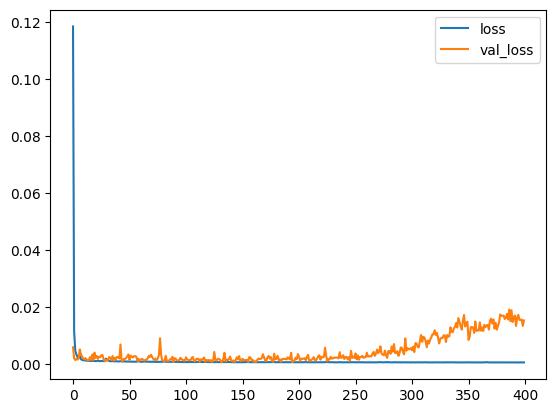

In [120]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [121]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [122]:
losses = pd.DataFrame(model.history.history)

<Axes: >

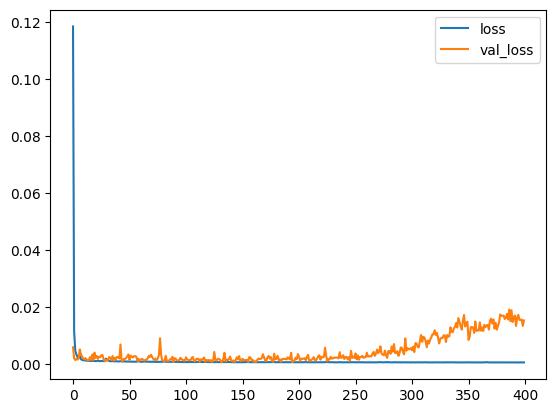

In [123]:
losses.plot()

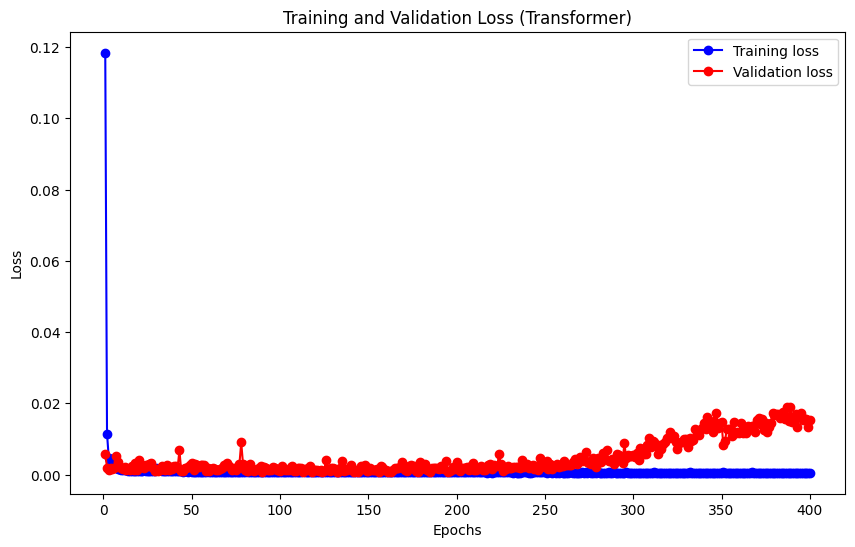

In [124]:
# Extracting the loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating epochs range from 1 to 400 (or you can use len(train_loss) if you prefer)
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss (Transformer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/kaggle/working/train_validation Transformer.png')
plt.show()

## Training the Model

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [126]:
predictions = model.predict(X_test)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [130]:
mean_squared_error(y_test,predictions)

0.015256827723792528

In [131]:
explained_variance_score(y_test,predictions)

0.6871839716895445

In [116]:
mean_absolute_error(y_test,predictions)

0.015487576259141999

# Evaluation on Test Data

#### Predicting on Brand New Data

In [53]:
X_test

array([[[0.12121212, 0.28125   , 0.13433962, ..., 0.00809719,
         0.81818182, 0.        ]],

       [[0.15151515, 0.375     , 0.19698113, ..., 0.00646948,
         0.63636364, 0.        ]],

       [[0.12121212, 0.3125    , 0.26264151, ..., 0.01037736,
         0.63636364, 0.        ]],

       ...,

       [[0.12121212, 0.3125    , 0.16181132, ..., 0.00430648,
         0.81818182, 0.        ]],

       [[0.12121212, 0.21875   , 0.14792453, ..., 0.01045203,
         1.        , 0.        ]],

       [[0.12121212, 0.3125    , 0.17207547, ..., 0.00614095,
         1.        , 0.        ]]])

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.011318139636423682

0.0005121437736623032

0.8032995122582152

In [59]:
df['price'].mean()

540088.1417665294

In [60]:
df['price'].median()

450000.0

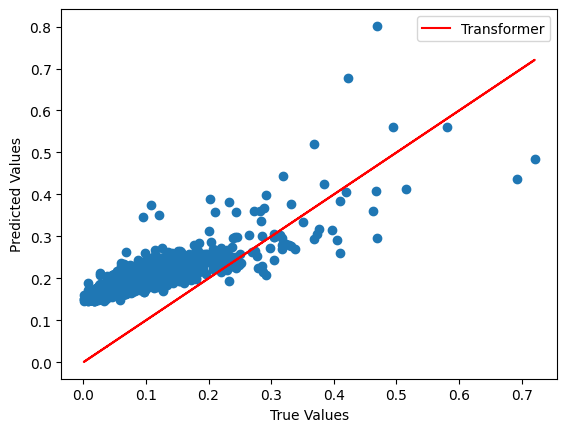

In [132]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r', label='Transformer')
# Add labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Save the plot
plt.savefig('/kaggle/working/Transformer.png')

# Show the plot
plt.show()



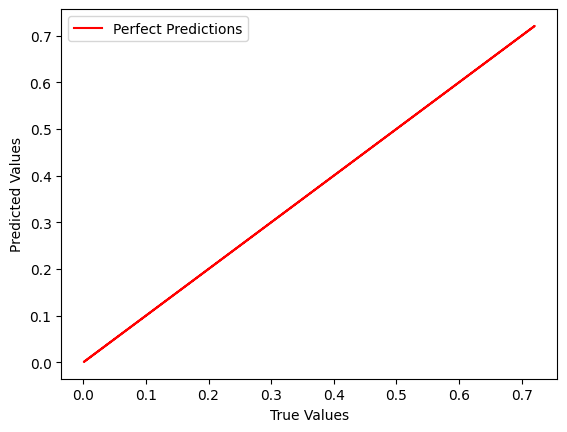

In [108]:
# Plot perfect predictions line
plt.plot(y_test, y_test, 'r', label='Perfect Predictions')

# Add labels and legend
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

# Save the plot
plt.savefig('predictions_plot.png')

# Show the plot
plt.show()

-------------
### Predicting on a brand new house

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler_X.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

In [ ]:
df.iloc[0]